<a href="https://colab.research.google.com/github/Bibi852/jhu-ml/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1

Cross-validation is a technique used to assess models in statistics and machine learning. Instead of fitting a model once with a single training and testing set, cross-validation repeats this process multiple times using several randomly split subsets. The results are then aggregated for more accurate and reliable measures of model performance compared to the single value obtained through a traditional train-test split method. Moreover, by using every observation in model development and evaluation, this method makes the most small amounts of data, which is often the case when analyzing real-world phenomena and resources.

## Exercise 2

  
Bootstrapping is a powerful tool for data analysis in nontraditional scenarios where standard statistical methods may not apply. There is no way to calculate a standard error for metrics like percentiles or medians, and real-world limitations like small amounts of data or non-normal distributions violate the assumptions made in parametric statistics. Yet, by simulating results from tens of thousands of resampled sets from the original group of sample observations, bootstrapping effectively reconstructs the sampling distribution assumed in traditional statistics, thus allowing statisticians to manually calculate measures of precision like the standard error or confidence intervals.

## Exercise 3

### Importing Packages and Dataset

In [1]:
pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
 

In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA ,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
Auto = load_data('Auto')
Auto.columns
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
mpg01 = Auto.mpg > Auto['mpg'].median()
Auto['mpg01'] = mpg01

In [22]:
mpg01.value_counts()

,count
mpg,
False,196
True,196


### Preliminary Explorations

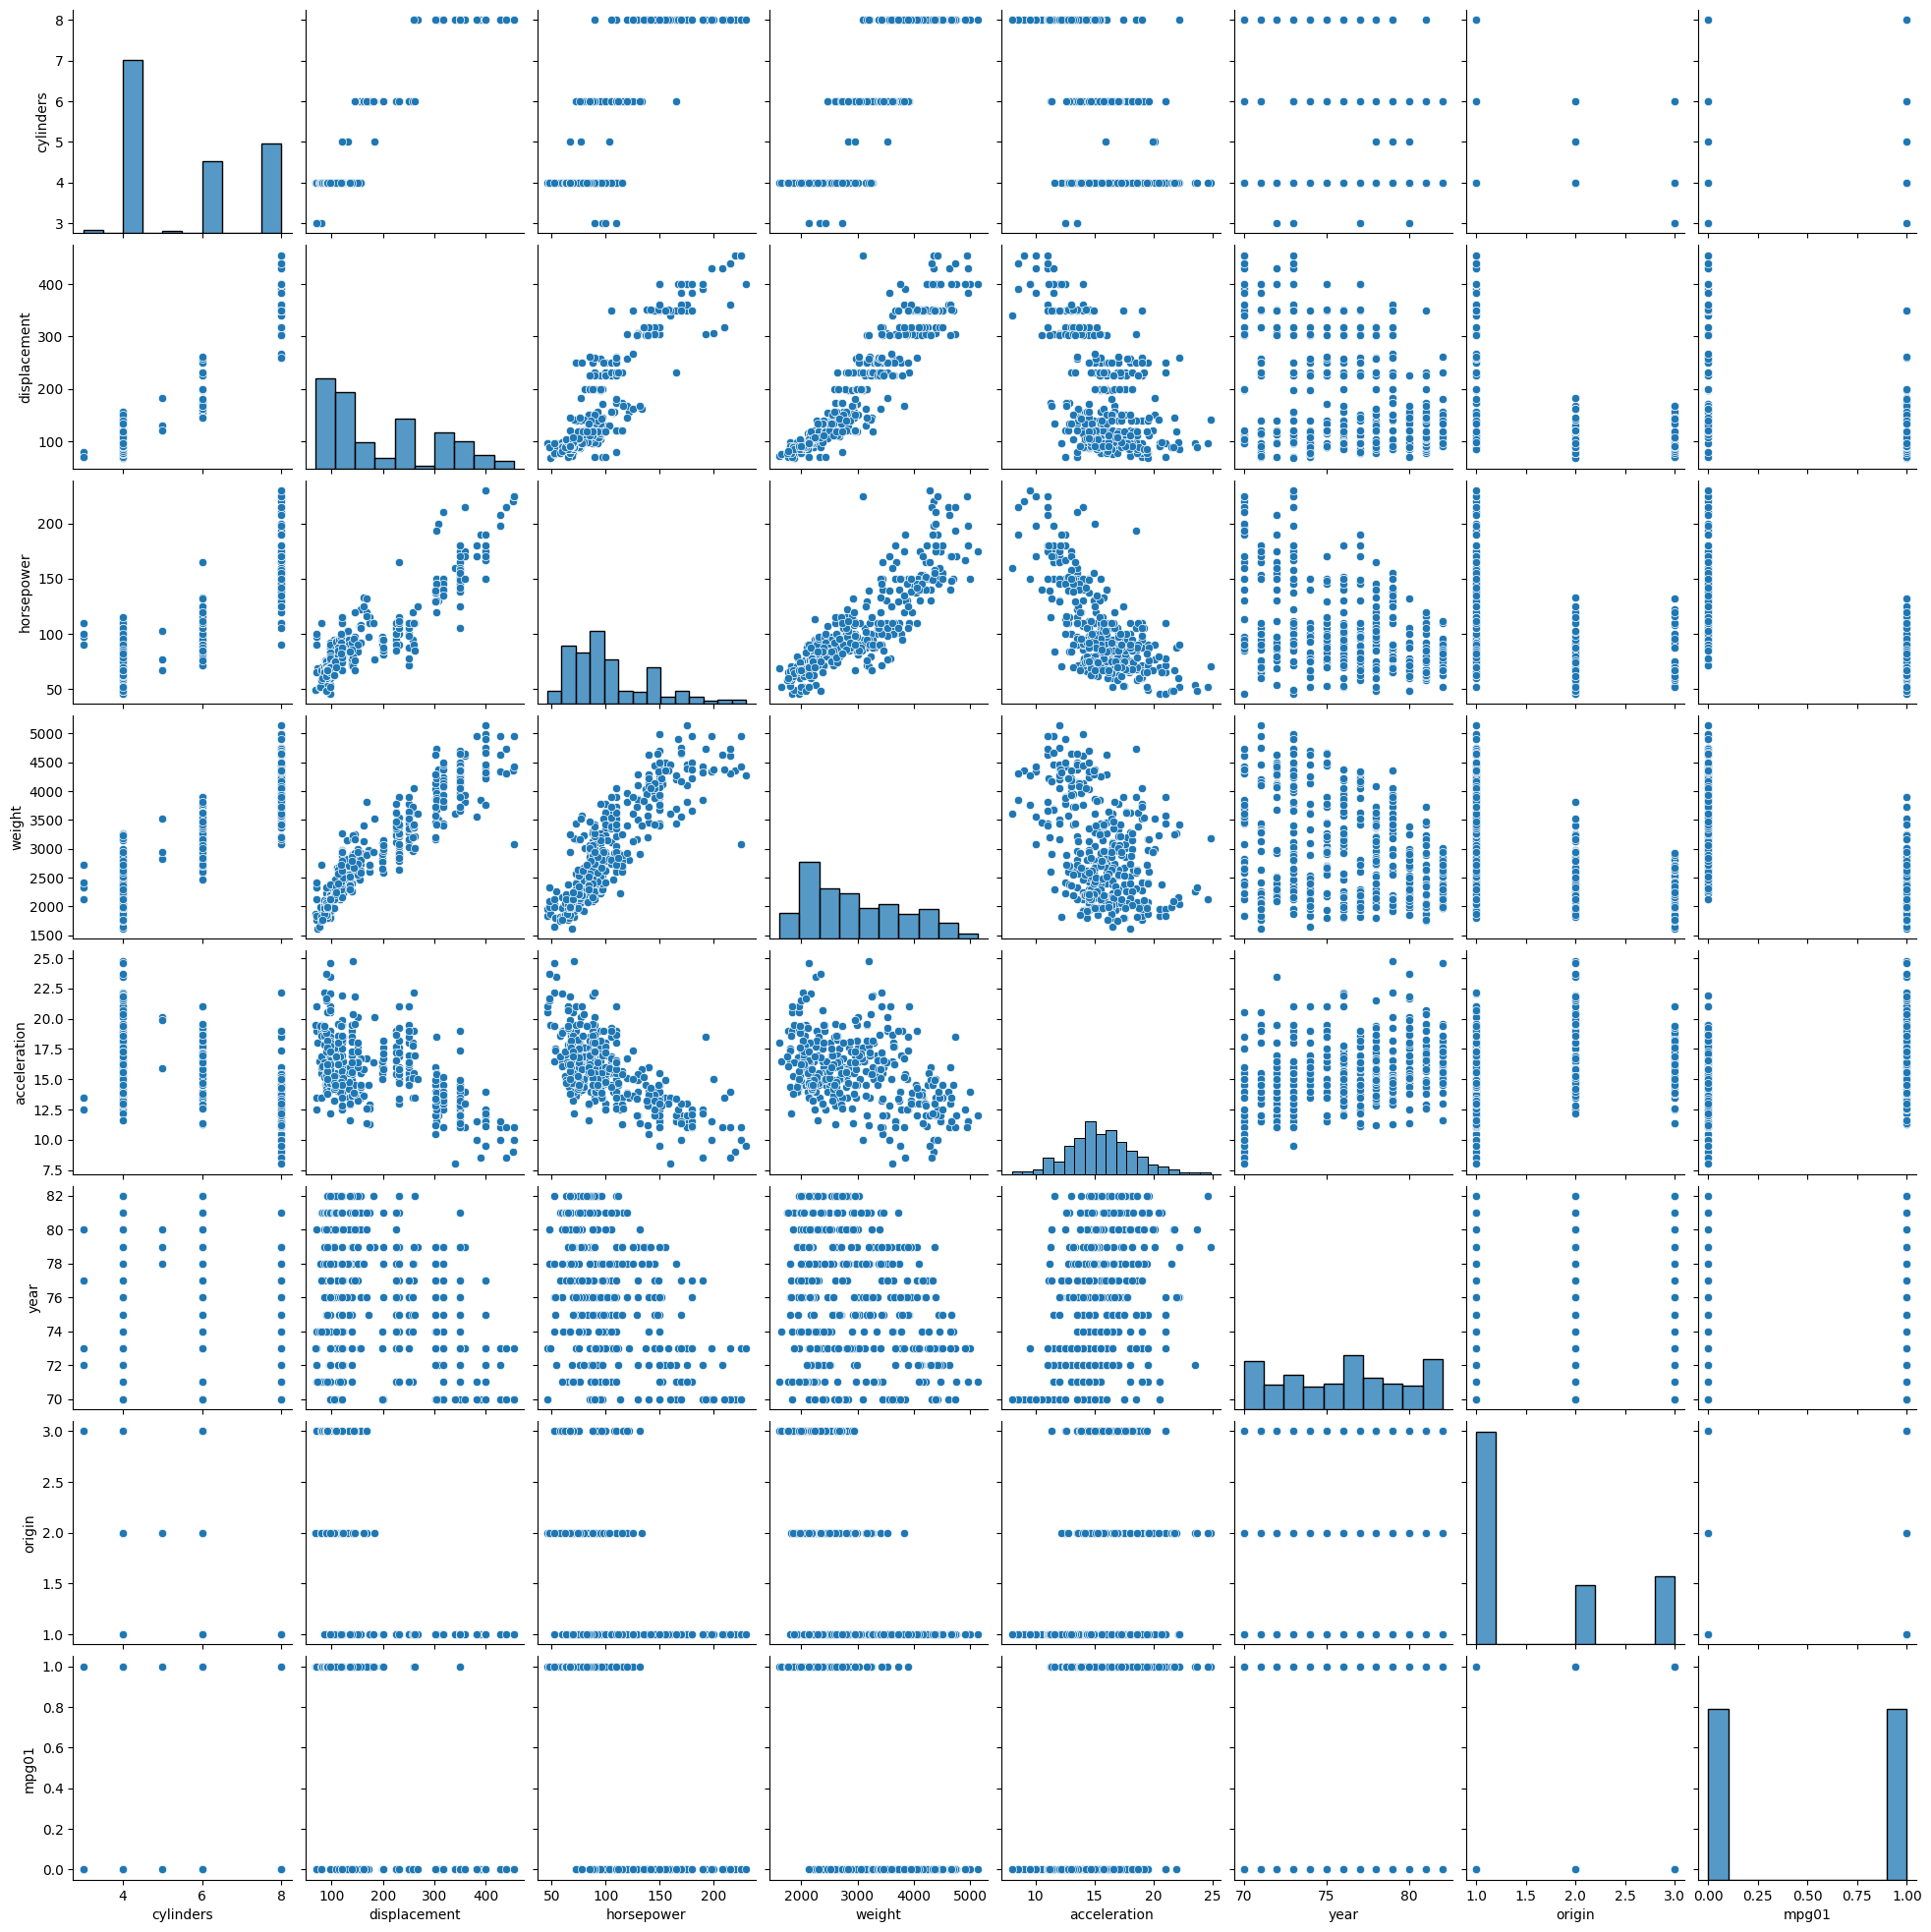

In [10]:
import seaborn as sns
# add formatting and shizz later
sns.pairplot(Auto.drop(columns=['mpg']))

In [12]:
Auto.drop(columns=['mpg']).corr()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


### Splitting Data

In [13]:
feature_df = Auto[['cylinders', 'displacement', 'weight', 'horsepower']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, mpg01, test_size = 0.3, random_state = 42)


### LDA

In [15]:
lda = LDA(store_covariance = True)

In [18]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [20]:
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,False,True
Predicted,,
False,51,2
True,14,51


In [21]:
np.mean(lda_pred == y_test)
# pretty good given that mpg is split in the middle

0.864406779661017

### QDA

In [26]:
qda = QDA(store_covariance = True)
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [30]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, y_test)


Truth,False,True
Predicted,,
False,51,3
True,14,50


In [31]:
np.mean(qda_pred == y_test)
# lower than for lda
# small nobs, four predictors means it may be too high variance

0.8559322033898306

In [32]:
Auto.shape

(392, 9)

### Logistic Regression

In [35]:
glm = sm.GLM(y_train, X_train, family = sm.families.Binomial())
results = glm.fit()
glm_probs = results.predict(exog = X_test)
labs = np.array([False]*len(X_test))
labs[glm_probs>0.5] = True
confusion_table(labs, y_test)


Truth,False,True
Predicted,,
False,45,1
True,20,52


In [36]:
np.mean(labs == y_test)
# not good - not good sensitivity - check later

0.8220338983050848

### NB

In [38]:
NB = GaussianNB()
NB.fit(X_train, y_train)
nb_labs = NB.predict(X_test)
confusion_table(nb_labs, y_test)

Truth,False,True
Predicted,,
False,51,2
True,14,51


In [39]:
np.mean(nb_labs == y_test)
# pretty good - even though there is high covariance between predictors - which is not a concern given our objective of classification instead of inference

0.864406779661017

### KNN

In [40]:
def knnfun(n):
  knn = KNeighborsClassifier(n_neighbors = n)
  knn_pred = knn.fit(X_train, y_train).predict(X_test)
  return knn_pred

for K in range(1,6):
  knn_pred = knnfun(K)
  C = confusion_table(knn_pred, y_test)
  test_error = np.mean(knn_pred == y_test)
  print(f"K={K}, test_error = {test_error}\n")

K=1, test_error = 0.847457627118644

K=2, test_error = 0.847457627118644

K=3, test_error = 0.864406779661017

K=4, test_error = 0.8559322033898306

K=5, test_error = 0.8389830508474576



3 neighbors performs the best

## Exercise 4.1

In [42]:
Boston = load_data('Boston')
Boston['nox'] = Boston['nox']*100
# creating binary outcome variable
y = Boston.ptratio > Boston['ptratio'].median()
# updating original variable
Boston['ptratio'] = y

In [43]:
Boston.corr(numeric_only = True)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.373713,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.330803,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.525271,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.147982,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.411811,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.324206,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.366000,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.333258,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.591160,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.598506,0.543993,-0.468536


rad, tax, indus, medv, and lstat seem interesting for predicting ptratio

In [135]:
def logfun(X_train, X_test, y_train, y_test):
  glm_train = sm.GLM(y_train, X_train, family = sm.families.Binomial())
  results = glm_train.fit()
    # prediction on test set
  probs = results.predict(exog = X_test)
  labs = np.array([False]*len(X_test))
  labs[probs>0.5]=True
  acc_score = np.mean(labs == y_test)
  return acc_score

def ldafun(X_train, X_test, y_train, y_test):
  lda = LDA(store_covariance = True)

  lda.fit(X_train, y_train)
  lda_pred = lda.predict(X_test)
  acc_score = np.mean(lda_pred == y_test)
  return acc_score

def nbfun(X_train, X_test, y_train, y_test):
  NB = GaussianNB()
  NB.fit(X_train, y_train)
  nb_pred = NB.predict(X_test)
  acc_score = np.mean(nb_pred == y_test)
  return acc_score

def knnextfun(n, X_train, X_test, y_train, y_test):
  knn = KNeighborsClassifier(n_neighbors = n)
  knn_pred = knn.fit(X_train, y_train).predict(X_test)
  acc_score = np.mean(knn_pred == y_test)
  return acc_score

def knniterfun(X_train, X_test, y_train, y_test):
  acc_scores= []
  for K in range(1,6):
    acc_score = knnextfun(K, X_train, X_test, y_train, y_test)
    acc_scores.append([K, acc_score])

  return max(acc_scores, key=lambda item: item[1])





In [136]:
knniterfun()

TypeError: knniterfun() missing 4 required positional arguments: 'X_train', 'X_test', 'y_train', and 'y_test'

In [137]:
def class_fun():
  X2 = ['indus', 'rad', 'medv', 'lstat', 'tax']
  best_model = None
  best_score = 0
  log_accuracy_scores = {}
  lda_accuracy_scores = {}
  nb_accuracy_scores = {}
  knn_accuracy_scores = {}
  for i in range(1, len(X2)+1):
  # iterating through each combination of variables
    for combo in itertools.combinations(X2, i):
      X2_list = list(combo)
      # fitting a given combination of variables
      X2_features = MS(X2_list).fit_transform(Boston)
      # splitting into train and test datasets
      X_train, X_test, y_train, y_test = train_test_split(X2_features, y, random_state = 42, test_size = 0.3)
      log_accuracy_scores[str(combo)]=  logfun(X_train, X_test, y_train, y_test)
      lda_accuracy_scores[str(combo)]=  ldafun(X_train, X_test, y_train, y_test)
      nb_accuracy_scores[str(combo)] = nbfun(X_train, X_test, y_train, y_test)
      knn_accuracy_scores[str(combo)] = knniterfun(X_train, X_test, y_train, y_test)

  return log_accuracy_scores, lda_accuracy_scores, nb_accuracy_scores, knn_accuracy_scores




In [138]:
log_accuracy_scores, lda_accuracy_scores, nb_accuracy_scores, knn_accuracy_scores = class_fun()

In [139]:
for i in [log_accuracy_scores, lda_accuracy_scores, nb_accuracy_scores]:
  max_key = max(i, key = i.get)
  max_val = i[max_key]
  max_entry = (max_key, max_val)
  print(max_entry)

("('rad', 'medv', 'lstat')", 0.7828947368421053)
("('indus', 'rad')", 0.7368421052631579)
("('indus', 'rad', 'tax')", 0.7631578947368421)


In [147]:
knn_accuracy_scores

{"('indus',)": [1, 1.0],
 "('rad',)": [5, 0.7236842105263158],
 "('medv',)": [5, 0.7039473684210527],
 "('lstat',)": [5, 0.5986842105263158],
 "('tax',)": [1, 0.9539473684210527],
 "('indus', 'rad')": [1, 1.0],
 "('indus', 'medv')": [3, 0.8223684210526315],
 "('indus', 'lstat')": [1, 0.8421052631578947],
 "('indus', 'tax')": [1, 1.0],
 "('rad', 'medv')": [1, 0.7894736842105263],
 "('rad', 'lstat')": [3, 0.743421052631579],
 "('rad', 'tax')": [1, 0.9802631578947368],
 "('medv', 'lstat')": [3, 0.6710526315789473],
 "('medv', 'tax')": [5, 0.9539473684210527],
 "('lstat', 'tax')": [3, 0.9276315789473685],
 "('indus', 'rad', 'medv')": [1, 0.9078947368421053],
 "('indus', 'rad', 'lstat')": [1, 0.8947368421052632],
 "('indus', 'rad', 'tax')": [1, 0.993421052631579],
 "('indus', 'medv', 'lstat')": [1, 0.7894736842105263],
 "('indus', 'medv', 'tax')": [1, 0.9736842105263158],
 "('indus', 'lstat', 'tax')": [1, 0.9736842105263158],
 "('rad', 'medv', 'lstat')": [3, 0.7763157894736842],
 "('rad', '

In [151]:
max(knn_accuracy_scores, key = lambda k: knn_accuracy_scores[k][0])

"('indus',)"

In [157]:
feature_df = Boston[['indus']]
X_train, X_test, y_train, y_test = train_test_split(feature_df, y, test_size = 0.3, random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
confusion_table(knn_pred, y_test)

Truth,False,True
Predicted,,
False,66,0
True,0,86


KNN supa supa good

## Exercise 4.2

In [158]:
from google.colab import files

In [159]:
uploaded = files.upload()

Saving fygpa.csv to fygpa.csv


In [161]:
import io
gpa = pd.read_csv(io.BytesIO(uploaded['fygpa.csv']))

In [162]:
gpa.describe()

,Unnamed: 0,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,110.000000,3.096164,3.452740,605.068493,634.292237,0.465753,13.108219,7.248858,0.114155,0.789954,0.922374
std,63.364028,0.465476,0.374794,83.393452,75.235572,0.499969,7.224647,5.000315,0.318728,0.408274,0.268194
min,1.000000,1.930000,2.340000,260.000000,430.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.500000,2.745000,3.170000,565.000000,580.000000,0.000000,8.000000,3.000000,0.000000,1.000000,1.000000
50%,110.000000,3.150000,3.500000,610.000000,640.000000,0.000000,13.000000,6.000000,0.000000,1.000000,1.000000
75%,164.500000,3.480000,3.760000,670.000000,690.000000,1.000000,17.000000,11.000000,0.000000,1.000000,1.000000
max,219.000000,4.150000,4.000000,740.000000,800.000000,1.000000,40.000000,21.000000,1.000000,1.000000,1.000000


In [173]:
y = gpa['GPA']
X = gpa[['HSGPA', 'HU', 'White']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [163]:
mlm = sm.OLS(y_train, X_train)
results = mlm.fit()
valid_pred = results.predict(X_test)
np.mean((y_test - valid_pred)**2)


0.1850706680072317

In [165]:
train_pred = results.predict(X_train)
np.mean((y_train - train_pred)**2)

0.18243912800072445

### LOOCV and CV

In [166]:
from functools import partial
from sklearn.model_selection import \
(cross_validate ,
KFold ,
ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

In [175]:
gpa_mod = sklearn_sm(sm.OLS)
cv_results = cross_validate(gpa_mod, X, y, cv=gpa.shape[0])
cv_err = np.mean(cv_results['test_score'])
cv_err

0.16024677597095902

In [179]:
cv_error = np.zeros(5)
cv = KFold(n_splits = 10, shuffle = True,
           random_state = 0)
gpa_cv = cross_validate(gpa_mod, X, y, cv = cv)
cv_err = np.mean(gpa_cv['test_score'])
cv_err

0.16057627830662996

MSE with LOOCV v cross val essentially the same - yet cross val with 10 splits substantially more efficient (prove later), and both are a lot better than test/training approach